---------------------------------------------------------------------
##타이타닉

- Survival - 생존유무, <---target 값. (0 = 사망, 1 = 생존)

- Pclass   - 승객 등급 (1등급=1, 2등급=2, 3등급=3)
- Sex      - 성별
- Age      - 나이(세)
- Sibsp    - 함께 탑승한 형제자매, 배우자 수 총합
- Parch    - 함께 탑승한 부모, 자녀 수 총합
- Ticket   - 티켓 넘버
- Fare     - 탑승 요금
- Cabin    - 객실 넘버
- Embarked - 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown
---------------------------------------------------------------------

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

print('train data shape: ', train.shape)
print('test data shape: ', test.shape)

train data shape:  (891, 12)
test data shape:  (418, 11)


In [103]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
## 결측치 확인
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [106]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [107]:
## train, test 둘다 결측치가 많은 2개변수(Age, Cabin)는 삭제하고 시작
train = train.drop(columns = ['Age', 'Cabin'])
test = test.drop(columns   = ['Age', 'Cabin'])

In [108]:
## 문자열로 된 변수 2개 삭제하고 시작
train = train.drop(columns = ['Name', 'Ticket'])
test = test.drop(columns  = ['Name', 'Ticket'])

In [110]:
################################################################
## 변수값 확인 및 결측치 보정작업

train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [111]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [112]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [113]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [114]:
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [115]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [116]:
## Sex, Embarked 인코딩 필요
train.loc[train['Sex'] =='male', 'Sex_1'] = 1  
train.loc[train['Sex'] =='female', 'Sex_1'] = 2

train.loc[train['Embarked'] =='S', 'Embarked_1'] = 1  
train.loc[train['Embarked'] =='C', 'Embarked_1'] = 2
train.loc[train['Embarked'] =='Q', 'Embarked_1'] = 3


test.loc[test['Sex'] =='male', 'Sex_1'] = 1  
test.loc[test['Sex'] =='female', 'Sex_1'] = 2

test.loc[test['Embarked'] =='S', 'Embarked_1'] = 1  
test.loc[test['Embarked'] =='C', 'Embarked_1'] = 2
test.loc[test['Embarked'] =='Q', 'Embarked_1'] = 3


## 인코딩전 변수 삭제
train = train.drop(columns = ['Sex', 'Embarked'])
test = test.drop(columns   = ['Sex', 'Embarked'])

train.head()


,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_1,Embarked_1
0,1,0,3,1,0,7.2500,1.0,1.0
1,2,1,1,1,0,71.2833,2.0,2.0
2,3,1,3,0,0,7.9250,2.0,1.0
3,4,1,1,1,0,53.1000,2.0,1.0
4,5,0,3,0,0,8.0500,1.0,1.0


In [117]:
## train, test 결측치 1~2개 있는 것 채움작업
train = train.fillna(1)    # Embarked 2개 결측치 : 1(최빈값)으로 채움
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Fare           0
Sex_1          0
Embarked_1     0
dtype: int64

In [118]:
test = test.fillna(test.mean())    # Fare 1개 결측치 : 평균값으로 채움
test.isna().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Fare           0
Sex_1          0
Embarked_1     0
dtype: int64

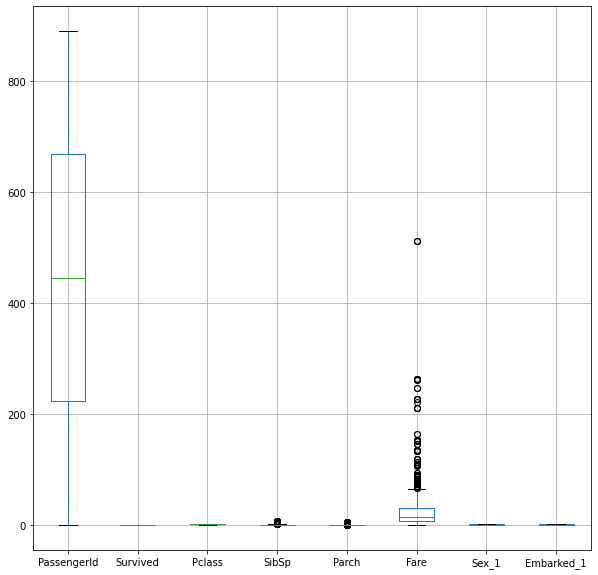

In [119]:
################################################################
## 변수들 그래프로 데이터 상황 확인

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
train.boxplot(ax=ax)


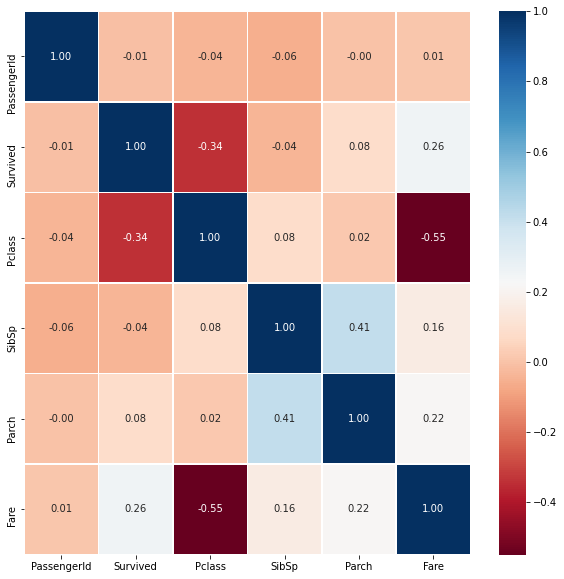

In [109]:
corr = train.corr()
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(corr, annot = True, fmt ='.2f', linewidths=.5, cmap='RdBu')
plt.show()

Text(0.5, 1.0, 'Embarked_1')

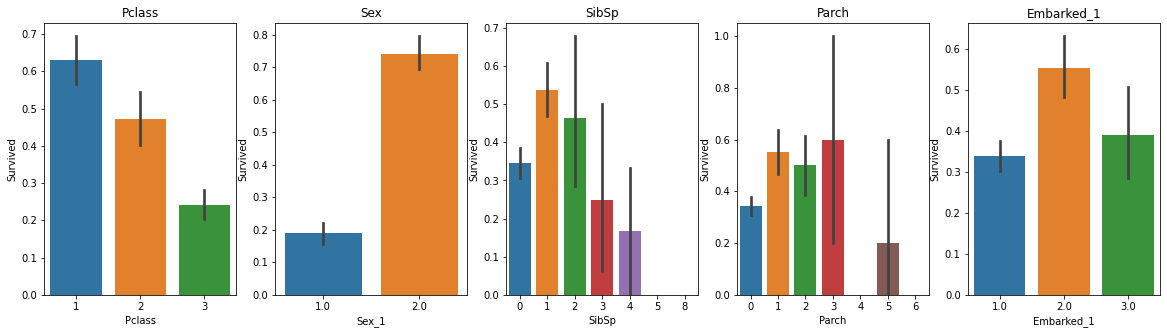

In [120]:
fig, ax = plt.subplots(ncols = 5, figsize = (20,5))
sns.barplot(data = train, x = 'Pclass', y = 'Survived', ax = ax[0])
sns.barplot(data = train, x = 'Sex_1', y = 'Survived', ax = ax[1])
sns.barplot(data = train, x = 'SibSp', y = 'Survived', ax = ax[2])
sns.barplot(data = train, x = 'Parch', y = 'Survived', ax = ax[3])
sns.barplot(data = train, x = 'Embarked_1', y = 'Survived', ax = ax[4])
ax[0].set_title('Pclass')
ax[1].set_title('Sex')
ax[2].set_title('SibSp')
ax[3].set_title('Parch')
ax[4].set_title('Embarked_1')

#==> 여자, 승객등급이 높은 사람이 생존자가 많다

In [121]:
################################################################
## 모델적용

X_train = train.drop(["PassengerId","Survived"], axis=1)
y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)


In [122]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(X_train, y_train)
Y_pred = LR.predict(X_test)
LR.score(X_train, y_train)

print("Logistic Regression Train Accuracy: {:.4f}".format(LR.score(X_train, y_train)))
print("Logistic Regression Test Accuracy: {:.4f}".format(LR.score(X_test, y_test)))


Logistic Regression Train Accuracy: 0.8020
Logistic Regression Test Accuracy: 0.7877


In [123]:
## xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_test, y_test)

print("xgboost Train Accuracy: {:.4f}".format(xgb.score(X_train, y_train)))
print("xgboost Test Accuracy: {:.4f}".format(xgb.score(X_test, y_test)))


xgboost Train Accuracy: 0.8553
xgboost Test Accuracy: 0.7821
